In [146]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [147]:
# Chargement des données
dataset = fetch_california_housing()

In [148]:
# Création d'un dataframe contenant les données
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data["Y"] = dataset.target

In [149]:
# Affichage des 5 premières lignes
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [150]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

#### 1) Expliquer ce que fait l'opération suivante

In [151]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Y             0
dtype: int64

#### 2) On va maintenant séparer les covariables $(x_i)_{1\leq i\leq n}$ de la variable à prédire $(y_i)_{1\leq i\leq n}$ 

In [152]:
# Covariables = toutes les colonnes du dataframe sauf la target 'Y'
X = data.drop(columns='Y')# A compléter
# Variable à prédire : colonne 'Y'
Y = data.Y # A compléter

#### 3) Séparer les données (tableaux X et Y) entre apprentissage et test

Utiliser la fonction `train_test_split` importée ci-dessous (n'hésitez pas à regarder la documentation pour voir comment elle fonctionne). Garder 25% des données pour le test.

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
# Générer 2 matrices X_train, X_test et 2 vecteurs Y_train, Y_test contenant les covariables 
# et la variable à prédire pour les échantillons train et test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

#### 4) Normaliser les données
Aurait-on pu normaliser les données avant le train / test split ? Pourquoi ?

Normaliser les données colonne par colonne :
$$ x_i^{norm} = \frac{x_i - \widehat{\mu}_i}{\widehat{\sigma_i}}$$
où $\widehat{\mu}_i$ et $\widehat{\sigma_i}$ sont des estimateurs de la moyenne et de l'écart-type de la variable $i$.

Faire la normalisation :
+ dans un premier temps à la main
+ dans un second temps, en utilisant le module sklearn

In [155]:
# A la main
mu, sig = X_train.mean(), X_train.std()
X_train_normed, X_test_normed = (X_train - mu)/sig, (X_test - mu)/sig

In [156]:
# En passant par sklearn : regarder la documentation et les exemples
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normed2, X_test_normed2 = scaler.transform(X_train), scaler.transform(X_test)

#### 5) Entraînement d'un modèle de régression linéaire

Commencer par ajouter une colonne de 1 à X_train et X_test. Ce qui correspondra à l'intercept (ordonnée à l'origine)

**Rappel:** On estime les coefficients de la régression par minimisation de la somme des carrés résiduels
$$ \widehat{\theta} = argmin \vert\vert \boldsymbol{Y- X}\theta \vert\vert_2^2$$

La solution est :
$\widehat{\theta} = ...$ à compléter puis l'implémenter

In [157]:
X_train_normed = np.concatenate([np.ones((X_train_normed.shape[0],1)), X_train_normed], axis=1)
X_test_normed = np.concatenate([np.ones((X_test_normed.shape[0],1)), X_test_normed], axis=1)

In [158]:
import numpy as np

In [162]:
# Calcul à la main
theta_est = np.linalg.inv(X_train_normed.T @ X_train_normed) @ X_train_normed.T @ Y_train

In [163]:
theta_est

array([ 2.07770667,  0.83169715,  0.12159895, -0.26759453,  0.30984998,
       -0.00518071, -0.04040552, -0.90739833, -0.88215577])

#### 6) Calculer les prédictions sur le jeu de test. Calculer l'accuracy et représenter l'ajustement sur un graphe predictions vs vérité)

In [164]:
pred_test = X_test_normed @ theta_est

In [165]:
((pred_test-Y_test)**2).mean()

0.5356532845422556

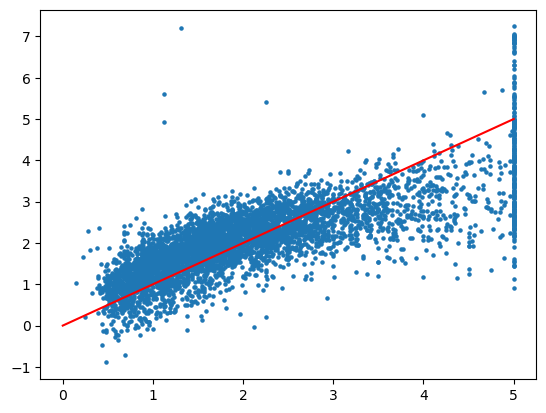

In [166]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, pred_test, s=5)
plt.plot([0,5], [0,5], color="red")

#### Même chose en utilisant scikit-learn

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
lr_model = LinearRegression(fit_intercept=False)

In [171]:
lr_model.fit(X_train_normed, Y_train)

LinearRegression(fit_intercept=False)

In [172]:
lr_model.coef_

array([ 2.07770667,  0.83169715,  0.12159895, -0.26759453,  0.30984998,
       -0.00518071, -0.04040552, -0.90739833, -0.88215577])

#### 7) Ranger toutes ces étapes dans une fonction
On évaluera avec le coefficient de détermination R2 importé ci-dessous

In [175]:
from sklearn.metrics import r2_score

In [176]:
def train_and_eval(model, X, Y, random_state=0):
    '''
    Arguments :
        - model (instance de modèle de régression scikit-learn)
        - X : covariables
        - Y : variable à prédire
        - random_state : seed pour l'initialisation du générateur aléatoire
    '''
    # Train test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state)
    # Normalisation
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_normed, X_test_normed = scaler.transform(X_train), scaler.transform(X_test)
    # Ajout de l'intercept (facultatif)
    X_train_normed = np.concatenate([np.ones((X_train_normed.shape[0],1)), X_train_normed], axis=1)
    X_test_normed = np.concatenate([np.ones((X_test_normed.shape[0],1)), X_test_normed], axis=1)
    # Entraînement du modèle
    model.fit(X_train_normed, Y_train)
    # Evaluation : r2 score 
    return r2_score(Y_test, model.predict(X_test_normed))

#### 8) Appliquer cette fonction à la régression linéaire et répéter 100 fois le processus (apprentissage + évaluation). Puis représenter la dispersion des résultats obtenus sur un histogramme.


In [177]:
lr_model = LinearRegression(fit_intercept=False)

In [178]:
r2_scores_lr = [train_and_eval(lr_model, X, Y, k) for k in range(100)]

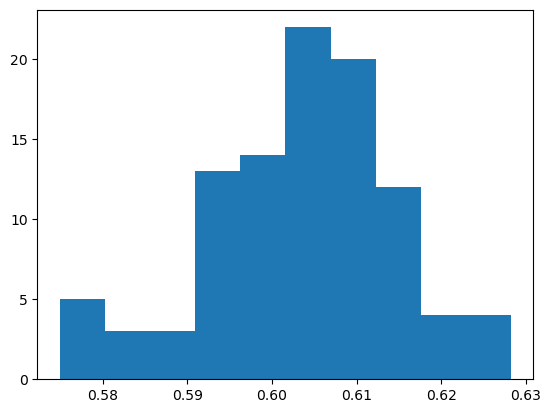

In [180]:
plt.hist(r2_scores_lr)
plt.show()

#### 9) Procéder de même en changeant le modèle prédictif : par exemple en utilisant les K plus proches voisins

Si l'on considère la moyenne des scores obtenus sur les répétitions, est-ce une estimation :
+ de l'erreur conditionnelle ?
+ de l'erreur moyenne (intégrée) ?

Quel modèle semble le plus performant ? Peut-on le valider statistiquement ?

In [181]:
from sklearn.neighbors import KNeighborsRegressor

In [182]:
knn_model = KNeighborsRegressor()

In [183]:
r2_scores_knn = [train_and_eval(knn_model, X, Y, k) for k in range(100)]

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rf_model = RandomForestRegressor(n_estimators=10)

In [186]:
r2_scores_rf = [train_and_eval(rf_model, X, Y, k) for k in range(100)]

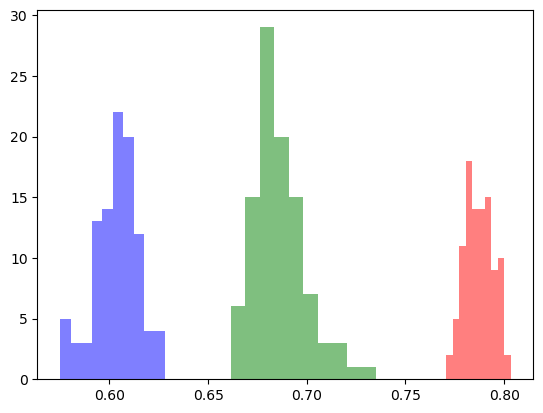

In [187]:
plt.hist(r2_scores_lr, color='blue', alpha=0.5)
plt.hist(r2_scores_knn, color='green', alpha=0.5)
plt.hist(r2_scores_rf, color='red', alpha=0.5)
plt.show()